In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("framingham.csv")
display(df)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


# Preprocessing data

In [3]:
# "male" was shown to be IN SIGNIFICANT, during T TEst(based on p-value)
# "diabetes" was shown to be IN SIGNIFICANT, during T TEst(based on p-value)
# "currentSmoker" fails in chi-square test
df=df.drop(axis=1,labels=["male","education","diabetes","currentSmoker"])
df


,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
0,39,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30.0,0.0,0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50,1.0,0.0,0,1,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,51,43.0,0.0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,48,20.0,NaN,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,44,15.0,0.0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
#To understand , which attribute has how many ("NULL" or NaN) values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 4238 non-null   int64  
 1   cigsPerDay          4209 non-null   float64
 2   BPMeds              4185 non-null   float64
 3   prevalentStroke     4238 non-null   int64  
 4   prevalentHyp        4238 non-null   int64  
 5   totChol             4188 non-null   float64
 6   sysBP               4238 non-null   float64
 7   diaBP               4238 non-null   float64
 8   BMI                 4219 non-null   float64
 9   heartRate           4237 non-null   float64
 10  glucose             3850 non-null   float64
 11  POSSIBILITY OF CVD  4238 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 397.4 KB


In [5]:
# each column has 4238 entries.
# for attribute "glucose" , there are only 3850 "not-NULL" entries
#df.fillna?

In [6]:
# for categorical attributes, we replace Nan with most frequent attribute
#for continous attributes,we replace Nan with mean .

#for continous attributes--->replace Nan with mean
df["cigsPerDay"]=df["cigsPerDay"].fillna(round(df["cigsPerDay"].mean()))
df["totChol"]=df["totChol"].fillna(round(df["totChol"].mean()))
df["BMI"]=df["BMI"].fillna(round(df["BMI"].mean(),2))
df["heartRate"]=df["heartRate"].fillna(round(df["heartRate"].mean()))
df["glucose"]=df["glucose"].fillna(round(df["glucose"].mean()))


#for categorical attributes-->replace Nan with most freq value
vall,freqq=np.unique(df["BPMeds"],return_counts=True)
#display(vall,freqq)
df["BPMeds"]=df["BPMeds"].fillna(vall[freqq.argmax()])

display(df)

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,POSSIBILITY OF CVD
0,39,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30.0,0.0,0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4233,50,1.0,0.0,0,1,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,51,43.0,0.0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,48,20.0,0.0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,44,15.0,0.0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 4238 non-null   int64  
 1   cigsPerDay          4238 non-null   float64
 2   BPMeds              4238 non-null   float64
 3   prevalentStroke     4238 non-null   int64  
 4   prevalentHyp        4238 non-null   int64  
 5   totChol             4238 non-null   float64
 6   sysBP               4238 non-null   float64
 7   diaBP               4238 non-null   float64
 8   BMI                 4238 non-null   float64
 9   heartRate           4238 non-null   float64
 10  glucose             4238 non-null   float64
 11  POSSIBILITY OF CVD  4238 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 397.4 KB


# Logistic Regression Implementation

### step 0: Preparing Data

In [8]:
# random shuffling of data
#df=df.sample(frac=1)
#display(df)

#not doing this step, as data is already shuffled, as per dataset discription

In [9]:
# taking data , from the DataFrame object, to numpy object
data=df.values
print(data)
print(data.shape)
print(type(data))

[[ 39.   0.   0. ...  80.  77.   0.]
 [ 46.   0.   0. ...  95.  76.   0.]
 [ 48.  20.   0. ...  75.  70.   0.]
 ...
 [ 48.  20.   0. ...  84.  86.   0.]
 [ 44.  15.   0. ...  86.  82.   0.]
 [ 52.   0.   0. ...  80. 107.   0.]]
(4238, 12)
<class 'numpy.ndarray'>


In [10]:
#separating target label, from rest of the attributes
X=data[:,:-1]  
Y=data[:,-1]  # target label
print(X)
print(X.shape)
print(Y)
print(Y.shape)

[[ 39.     0.     0.   ...  26.97  80.    77.  ]
 [ 46.     0.     0.   ...  28.73  95.    76.  ]
 [ 48.    20.     0.   ...  25.34  75.    70.  ]
 ...
 [ 48.    20.     0.   ...  22.    84.    86.  ]
 [ 44.    15.     0.   ...  19.16  86.    82.  ]
 [ 52.     0.     0.   ...  21.47  80.   107.  ]]
(4238, 11)
[0. 0. 0. ... 0. 0. 0.]
(4238,)


### performing Data Normalisation

In [11]:
 # data normalisation (mean=0,,,and std deviation=1 along each axis)
# squeezing the features to [-1,1] range
x_mean=X.mean(axis=0)
print(x_mean)
x_std=X.std(axis=0)
print(x_std)

#applying the transformation
X=(X-x_mean)/x_std

[4.95849457e+01 9.00306748e+00 2.92590845e-02 5.89900897e-03
 3.10523832e-01 2.36724870e+02 1.32352407e+02 8.28934639e+01
 2.58019986e+01 7.58789523e+01 8.19697971e+01]
[ 8.57114852 11.87782862  0.16853187  0.07657813  0.4627081  44.32123288
 22.03549643 11.90944427  4.07047223 12.02375836 22.83391071]


In [12]:
print(X.mean(axis=0))
# mean is v close to 0 now
print(X.std(axis=0))
#std dev is 1 along each axis

[ 1.30774737e-16  3.85617813e-17 -4.02383805e-17 -1.00595951e-17
 -5.02979756e-17 -2.01191903e-16 -4.51005181e-16  2.98434655e-16
  3.26936842e-16 -5.80103319e-16 -2.93404858e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### step1: Spliting Data for Training and Testing

In [13]:
#performing split , to train,test data
split=0.7*X.shape[0]
print(split)
split=int(split)
print("split length:",split)
print()

X_train= X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]

print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",Y_train.shape)
print("Y_test:",Y_test.shape)

2966.6
split length: 2966

X_train: (2966, 11)
X_test: (1272, 11)
Y_train: (2966,)
Y_test: (1272,)


In [14]:
X_train

array([[-1.23495068, -0.7579725 , -0.17361158, ...,  0.28694494,
         0.34274206, -0.21764984],
       [-0.41825733, -0.7579725 , -0.17361158, ...,  0.71932721,
         1.59027212, -0.26144436],
       [-0.18491638,  0.92583694, -0.17361158, ..., -0.1135    ,
        -0.0731013 , -0.52421143],
       ...,
       [-0.0682459 , -0.7579725 , -0.17361158, ..., -1.13549444,
        -0.15626997,  0.2640898 ],
       [ 2.1484932 ,  0.50488458, -0.17361158, ..., -0.65643454,
        -0.0731013 , -0.43662241],
       [-1.23495068,  0.92583694, -0.17361158, ..., -0.0717358 ,
        -0.98795668,  0.96480201]])

### step2 : LR Implementation

In [15]:
 def sigmoid(z):
        return 1.0/(1.0 + np.exp(-z))
        

In [16]:
#sigmoid value for a large number is 1
sigmoid(100)

1.0

In [17]:
#sigmoid value for a smaller number is approx 0
sigmoid(-100)

3.7200759760208356e-44

In [18]:
def hypothesis(x,theta):
    """
    x= entire data array(with 0th column as 1, added mannually): m,n+1
    theta= n+1,1
    """
    #this gives gavues of the "prediction" we are making
    return sigmoid(np.dot(x,theta))

In [19]:
# to find optimal theta
# error (or) cost function
# cost function is a "convex curve",thus global minima can be obtained, using "gradient descent" 
def error(x,y,theta):
    """
    x=m,n+1
    y=m,1
    theta=n+1,1
    
    return : scalar_value =loss
    """
    hi=hypothesis(x,theta)
    #finding error
    e=-1*np.mean((y*np.log(hi) +  (1-y)*np.log(1-hi)))
    return e

In [20]:
# initially theta has all values as 0
# thus our separating line, initially is the x -axis

In [21]:
def gradient(x,y,theta):
    """
    x=m,n+1
    y=m,1
    theta=n+1,1
    
    return : gradient_vector =(n+1,1)
    """
    hi=hypothesis(x,theta)
    # "hi" is our prediction , based on current "theta"
    grad=-np.dot(x.T,(y-hi))
    m=x.shape[0]
    return grad/m
    
    

In [22]:
def gradient_descent(x,y,lr=0.1,max_itr=200):
    """
    lr:learning rate
    max_itr: max iterations we will take, to get optimal theta
    x=m,n+1
    y=m,1
    """
    #no of attributes , for each row 
    n=X.shape[1]
    theta=np.zeros((n+1,1))
    
    error_list=[]
    # we will "error_list" in graph
    
    for i in range(max_itr):
        err=error(x,y,theta)
        error_list.append(err)
        
        grad=gradient(x,y,theta)
        #update theta using "gradient descent"
        theta=theta-(lr*grad)
    return (theta,error_list)
        
    

In [23]:
# initial theta
# thus our separating line, initially is the x -axis
n=X.shape[1]
theta=np.zeros((n,1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [24]:
# adding a column of "1" as the 1st column, to existing training set
ones=np.ones((X_train.shape[0],1))
X_new_train=np.hstack((ones,X_train))

#converting Y_train, from horizontal to vertical vector
Y_train_new=Y_train.reshape((-1,1))
print("after reshaping Y_train_new:",Y_train_new)
print("old shape",X_train.shape)
print("new shape",X_new_train.shape)
#printing 1st column
print("1st column=",X_new_train[:,0]) 

after reshaping Y_train_new: [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]
old shape (2966, 11)
new shape (2966, 12)
1st column= [1. 1. 1. ... 1. 1. 1.]


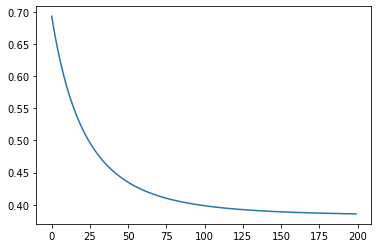

In [25]:
theta,error_list=gradient_descent(X_new_train,Y_train_new)
plt.plot(error_list)

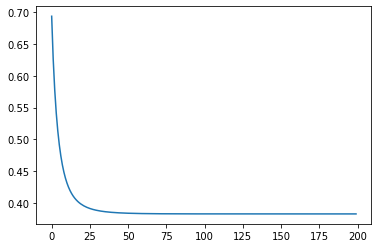

In [26]:
# "error" decreases sharply, with higher "learning rate"
theta,error_list=gradient_descent(X_new_train,Y_train_new,lr=0.5)
plt.plot(error_list)

In [27]:
#printing optimal theta
theta

array([[-1.93146029],
       [ 0.53168476],
       [ 0.35596401],
       [ 0.00351694],
       [ 0.09275231],
       [ 0.08587911],
       [ 0.05789626],
       [ 0.26928482],
       [ 0.00463666],
       [ 0.06188608],
       [-0.06350457],
       [ 0.22896026]])

### step 3: Testing with "Testing Set"

In [28]:
def predict(x,theta):
    h=hypothesis(x,theta)
    output=np.zeros(h.shape)
    
    output[h>=0.5]=1
    output=output.astype('int')
    return output,h

In [29]:
# adding a column of "1" as the 1st column, to testing set
ones=np.ones((X_test.shape[0],1))
X_new_test=np.hstack((ones,X_test))


print("old shape",X_test.shape)
print("new shape",X_new_test.shape)
#printing 1st column
print("printing 1st 3 rows,columns of X_new_train:")
print(X_new_test[:3,:4]) 

#converting Y_test, from horizontal to vertical vector
Y_test_new=Y_test.reshape((-1,1))
print("Y_test_new:")
print(Y_test_new)

old shape (1272, 11)
new shape (1272, 12)
printing 1st 3 rows,columns of X_new_train:
[[ 1.          0.51510649 -0.7579725  -0.17361158]
 [ 1.         -0.65159829 -0.50540109 -0.17361158]
 [ 1.         -0.41825733  2.8622178  -0.17361158]]
Y_test_new:
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [31]:
train_data_preds,h=predict(X_new_train,theta)
# hypothesis or prediction
print("h=",h)
print("train_data_preds=",train_data_preds)

#doing similarily for test data
test_data_preds,_=predict(X_new_test,theta)

h= [[0.03361241]
 [0.06136984]
 [0.12590923]
 ...
 [0.08162008]
 [0.32750229]
 [0.08385317]]
train_data_preds= [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [32]:
def accuracy(actual,preds):
    actual=actual.astype('int')
    #ensure that "actua","preds" are vertical vectors, with same dimensions
    correctPred=np.sum(actual==preds)
    acc=correctPred/actual.shape[0]
    return acc*100

    

In [33]:
train_acc=accuracy(Y_train_new,train_data_preds)

print(train_acc)

85.56979096426163


In [34]:
test_acc=accuracy(Y_test_new,test_data_preds)
print(test_acc)

85.45597484276729


# Prediction using inbuilt SKLearn (LR model)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model=LogisticRegression()

### training the model

In [37]:
model.fit(X_train,Y_train)

LogisticRegression()

In [38]:
# for 1st value
theta_0=model.intercept_
#for rest of the values
theta_s=model.coef_
print(theta_0,theta_s)



# compare these values , with "optimal theta" that we got
print("\n\ncomapring it with the theta that we got, previously:\n")
print(theta)

[-1.93114384] [[ 0.52983875  0.35495884  0.00355258  0.09267198  0.08512786  0.05786933
   0.27142914  0.00309357  0.06203515 -0.06332246  0.2283812 ]]


comapring it with the theta that we got, previously:

[[-1.93146029]
 [ 0.53168476]
 [ 0.35596401]
 [ 0.00351694]
 [ 0.09275231]
 [ 0.08587911]
 [ 0.05789626]
 [ 0.26928482]
 [ 0.00463666]
 [ 0.06188608]
 [-0.06350457]
 [ 0.22896026]]


### calculating Score

In [39]:
#score on training data
model.score(X_train,Y_train)*100

85.53607552258936

In [40]:
#score on testing data
model.score(X_test,Y_test)*100

85.45597484276729

### measuring Performane by evaluating Parameters

In [41]:
Y_pred=model.predict(X_test)

In [42]:
def evaluateParameters(Y_pred,Y_test):
    tp,tn,fp,fn=0,0,0,0
    for i in range(len(Y_test)):
        actual=Y_test[i]
        if(actual==1):
            if(actual==Y_pred[i]):
                tp+=1
            else:
                fn+=1
        else:
            if(actual==Y_pred[i]):
                tn+=1
            else:
                fp+=1
    print("\naccuracy= ",(tp+tn)/(tp+tn+fn+fp))
    print("\nsensitivity= ",tp/(tp+fn))
    print("\nspecificity= ",tn/(fp+tn))
    print("\nPPv= ",tp/(tp+fp))
    print("\nNPV= ",tn/(tn+fn))
    
            
            

In [43]:
evaluateParameters(Y_pred,Y_test)


accuracy=  0.8545597484276729

sensitivity=  0.06349206349206349

specificity=  0.9926131117266851

PPv=  0.6

NPV=  0.8586261980830671


# saving trained model, to deploy on web

In [46]:
import pickle

In [47]:
with open('lr_model.pkl','wb') as f:
    pickle.dump(model,f)